<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/glm_logistic_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# **Logistic Regression (Binary Classification)**





## Introduction

Logistic regression is a statistical method useful in scenarios where the categorical outcome variable has only two possible classes. It is a binary classification method that predicts the probability of an instance belonging to a particular category or class. The method derives its name from its use of the logistic function to model the probability of a given class.

Logistic regression falls under the category of supervised learning. This means that it makes predictions based on labeled data. The method is widely used in various fields, such as finance, healthcare, and marketing. Logistic regression is particularly useful in analyzing datasets with many variables and can be used to identify significant variables that influence the outcome variable.

Despite its name, logistic regression is not used for regression but rather for classification. It is a powerful tool that can help businesses and researchers make informed decisions based on the probability of an event occurring.

Here are the key concepts and components of logistic regression:

1.  **Sigmoid Function (Logistic Function):** The logistic regression model uses the sigmoid function to map any real-valued number into a value between 0 and 1. The sigmoid function is defined as:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

where $z$ is a linear combination of the input features and their corresponding weights.

2.  **Linear Combination:** The linear combination $z$ is given by:

$$ z = b + w_1x_1 + w_2x_2 + \ldots + w_nx_n $$

Here, $b$ is the bias term, $w_i$ are the weights associated with each feature $x_i$, and $n$ is the number of features.

3.  **Probability Prediction:** The output of the logistic regression model is the probability that a given input belongs to a particular class. The sigmoid function ensures that the output is bounded between 0 and 1.

$$ P(Y=1) = \sigma(z) $$ $$ P(Y=0) = 1 - \sigma(z) $$

4.  **Decision Boundary:** A decision boundary is a threshold used to classify instances into one of the two classes. If the predicted probability is above the threshold, the instance is assigned to class 1; otherwise, it is assigned to class 0.

5.  **Cost Function (Log Loss):** The logistic regression model is trained by minimizing a cost function, typically the log loss (cross-entropy) function. The goal is to find the set of weights and bias that minimizes the difference between the predicted probabilities and the actual class labels in the training data. Given a set of observations with binary outcomes (0 or 1), the log loss for a single observation is defined as:

$$ J(w,b) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})] $$

where $m$ is the number of training examples, $y^{(i)}$ is the true label for the i-th example, and $\hat{y}^{(i)}$ is the predicted probability of class 1 for the i-th example.

Logistic regression is widely used in various fields, including medicine, finance, and social sciences, for binary classification problems. It can be extended to handle multiclass classification through techniques such as one-vs-rest or one-vs-one.

## Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314955 sha256=8d2fef438035f43dcd719113350b807dfa3eb4cd81b80c833a78c1727d663191
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install necessary Python libraries

In [ ]:
!sudo apt-get install \
libssl-dev \
libcurl4-openssl-dev \
unixodbc-dev \
libxml2-dev \
libmariadb-dev \
libfontconfig1-dev \
libharfbuzz-dev \
libfribidi-dev \
libfreetype6-dev \
libpng-dev \
libtiff5-dev \
libjpeg-dev \
libcairo2-dev \
libgmp-dev \
libmpfr-dev \
liblapack-dev \
libcairo2-dev \
libzmq3-dev \
libharfbuzz-dev \
libpng-dev \
build-essential \
libcairo2-dev \
libmpfr-dev \
cmake \
gfortran

In [ ]:
!sudo apt-get install ghostscript
!sudo add-apt-repository ppa:dns/gnu
!sudo apt-get update
!sudo apt install libgsl-dev

## Check and Install required R Packages

In [ ]:
%%R
pkg <- c(
		 'devtools',
	   'remotes',
		 'tidyverse',
		 'DataExplorer',
     'plyr',
		 'gt',
		 'gtsummary',
		 'rstatix',
	  'report',
		 'performance',
		 'jtools',
		 'margins',
		 'marginaleffects',
		 'ggeffects',
		 'patchwork',
		 'Metrics',
		 'ggpmisc',
		 'caret',
		 'tidymodels',
     'RColorBrewer',
     'pROC',
     'ROCR'
      )
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')


In [ ]:
%%R
install.packages(c
("gsl", "enery"), lib='drive/My Drive/R/')
devtools::install_github("adriancorrendo/metrica", lib='drive/My Drive/R/')

## Load packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library(tidyverse)
library(plyr)
library(gt)
library(rstatix)
library(gtsummary)
library(DataExplorer)
library(report)
library(performance)
library(jtools)
library(margins)
library(marginaleffects)
library(ggeffects)
library(patchwork)
library(Metrics)
#library(metrica)
library(ggpmisc)
library(RColorBrewer)
library(pROC)

## Data

Our goal is to develop a logistic n model to predict paddy soil arsenic class using various irrigation water and soil properties. We have available data of 263 paired groundwater and paddy soil samples from arsenic contaminated areas in Tala Upazilla, Satkhira district, Bangladesh. This data was utilized in a publication titled "Factors Affecting Paddy Soil Arsenic Concentration in Bangladesh: Prediction and Uncertainty of Geostatistical Risk Mapping" which can be accessed via the this [URL](https://doi.org/10.1016/j.scitotenv.2011.10.008).

Full data set is available for download from my [Dropbox](https://www.dropbox.com/scl/fo/2rh6r68i9cxmgortvbw8q/h?rlkey=bvntt66n9mcywprmdki08ch3r&dl=0) or from my [Github](https://github.com/zia207/r-colab/tree/main/Data/Regression_analysis) accounts.

We will use `read_csv()` function of **readr** package to import data as a **tidy** data.

In [ ]:
%%R
mf<-readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/bd_soil_arsenic.csv")
glimpse(mf)

### Create a binary response variable

The `binary class` typically refers to a classification problem where there are only two possible classes or outcomes. As we see `SAs` is a continuous variable, but we need to convert it into binary class (contaminated and non-contaminated) based on our published paper. The paper suggests that we use the probability of exceeding the upper baseline soil arsenic concentration (14.8 mg/kg) to define soil samples as either As contaminated (`Yes`) or non-contaminated (`No`).

Here we will convert `Soil As (SAs)` into two classes- `Yes = Contaminated`and `No = noncontaminated` and create a new binary response variables (`Class_As`) with two levels:

Yes = `SAs` \> 14.8 mg As/kg

No = `SAs` \< 14.8 mg As/kg

In [6]:
%%R
mf$Class_As<- cut(mf$SAs,
                   breaks=c(-Inf, 14.8, Inf),
                   labels=c("No", "Yes"))
mf$Class_As<-as.factor(mf$Class_As)


### Data Exlporation



In [7]:
%%R
mf |>
  # select variables
  dplyr::select (WAs,  WFe,
                SAoFe, SOC,
                Year_Irrigation, Distance_STW,
                Land_type) |>
  get_summary_stats (type = "common")

# A tibble: 6 × 10
  variable        n     min     max  median    iqr    mean      sd     se     ci
  <fct>       <dbl>   <dbl>   <dbl>   <dbl>  <dbl>   <dbl>   <dbl>  <dbl>  <dbl>
1 WAs           263 1.1 e-2 4.58e-1 1.19e-1   0.1     0.13   0.079  0.005  0.01 
2 WFe           263 1.78e+0 1.10e+1 5.06e+0   2.64    5.29   1.97   0.121  0.239
3 SAoFe         263 1   e+3 4.94e+3 2.57e+3 565    2597.   626.    38.6   76.0  
4 SOC           263 5.4 e-1 2.64e+0 1.35e+0   0.33    1.36   0.307  0.019  0.037
5 Year_Irrig…   263 1   e+0 2   e+1 6   e+0   6       7.02   4.16   0.257  0.506
6 Distance_S…   263 3   e+0 4.5 e+1 9   e+0   5       9.50   6.14   0.378  0.745


#### Box/Violine plots

We can create a nice looking plots with results of ANOVA and post-hoc tests on the same plot (directly on the boxplots). We will use `gbetweenstats()` function of **ggstatsplot** package:

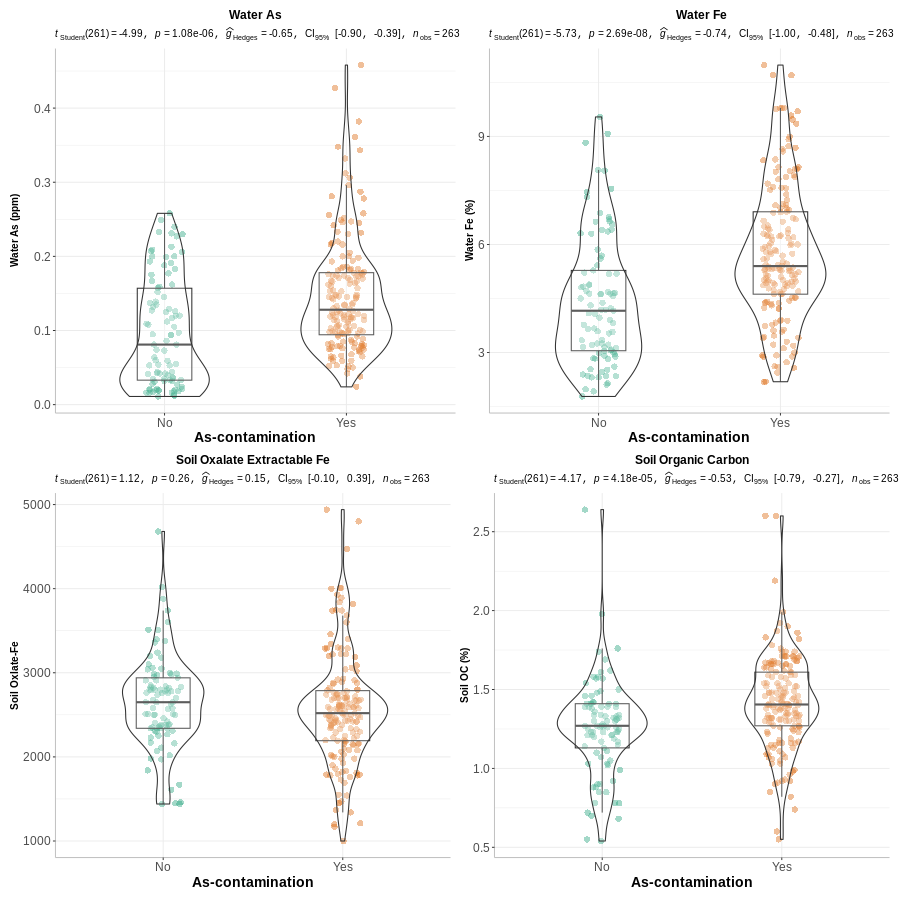

In [8]:
%%R -w 900 -h 900 -u px
p1<-ggstatsplot::ggbetweenstats(
  data = mf,
  x = Class_As,
  y = WAs,
  ylab = "Water As (ppm)",
  xlab = "As-contamination",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("Water As") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))

p2<-ggstatsplot::ggbetweenstats(
  data = mf,
  x = Class_As,
  y = WFe,
  ylab = "Water Fe (%)",
  xlab = "As-contamination",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("	Water Fe") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))

p3<-ggstatsplot::ggbetweenstats(
  data = mf,
  x = Class_As,
  y = SAoFe,
  ylab = "Soil Oxlate-Fe",
  xlab = "As-contamination",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("Soil Oxalate Extractable Fe") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))


p4<-ggstatsplot::ggbetweenstats(
  data = mf,
  x = Class_As,
  y = SOC,
  ylab = "Soil OC (%)",
  xlab = "As-contamination",
  type = "parametric", # ANOVA or Kruskal-Wallis
  var.equal = TRUE, # ANOVA or Welch ANOVA
  plot.type = "box",
  pairwise.comparisons = TRUE,
  pairwise.display = "significant",
  centrality.plotting = FALSE,
  bf.message = FALSE
)+
# add plot title
ggtitle("Soil Organic Carbon") +
   theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))


(p1|p2)/(p3|p4)

### Feature Engineering

Feature engineering is a vital task in the data preparation process for data analysis, particularly for machine learning models. It creates new features from ones or transforms them to enhance the machine learning algorithm's performance. Doing so makes achieving higher accuracy, better generalization, and a more straightforward interpretation of the model possible. Some standard techniques used in feature engineering include dimensionality reduction, feature scaling, and feature extraction. When performing feature engineering, it is essential to consider the data type, distribution, and target variable, among other factors.

We will apply following operation before fit a GLM regression model.

1.  create a new features: We will create a new feature (Sand_Silt) by adding soil Silt and Sand percentage

2.  Convert to factors: As Land_type is categorical variable representing distinct categories rather than numerical values, we need to convert them into factors. This process will allow us to analyze and interpret the data more accurately, facilitating a better understanding of the underlying patterns and trends.

In [9]:
%%R
df <- mf |>
  # select variables
  dplyr::select (WAs,  WFe,
                SAoFe, SOC,
                Year_Irrigation, Distance_STW,
                Land_type, Class_As) |>
   # convert to factor
   dplyr::mutate_at(vars(Land_type), funs(factor))  |>
   dplyr::mutate_at(vars(Class_As), funs(factor))  |>
   # normalize the all numerical features
   #dplyr::mutate_at(1:14,  funs((.-min(.))/max(.-min(.)))) |>
   glimpse()


Rows: 263
Columns: 8
$ WAs             <dbl> 0.059, 0.059, 0.079, 0.122, 0.072, 0.042, 0.075, 0.064…
$ WFe             <dbl> 3.44, 4.93, 9.70, 8.58, 4.78, 6.95, 7.81, 8.14, 8.99, …
$ SAoFe           <dbl> 2500, 2670, 2160, 2500, 2060, 2500, 2520, 2140, 2150, …
$ SOC             <dbl> 1.66, 1.26, 1.36, 1.61, 1.26, 1.74, 1.71, 1.69, 1.41, …
$ Year_Irrigation <dbl> 14, 20, 10, 8, 10, 9, 8, 10, 8, 2, 20, 4, 15, 10, 5, 4…
$ Distance_STW    <dbl> 5, 6, 5, 8, 5, 5, 10, 8, 10, 8, 5, 5, 9, 5, 10, 10, 12…
$ Land_type       <fct> MHL, MHL, MHL, MHL, MHL, MHL, MHL, MHL, MHL, MHL, MHL,…
$ Class_As        <fct> Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, No, Yes, …


### Split data to training and test

We will use the `ddply()` function of the **plyr** package to split soil carbon datainto homogeneous subgroups using **stratified random sampling**. This method involves dividing the population into strata and taking random samples from each stratum to ensure that each subgroup is proportionally represented in the sample. The goal is to obtain a representative sample of the population by adequately representing each stratum.


In [ ]:
%%R
seeds = 11076
tr_prop = 0.70
# training data (70% data)
train= ddply(df,.(Land_type, Class_As),
                 function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
test = ddply(df, .(Land_type, Class_As),
            function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)

Stratified random sampling is a technique for selecting a representative sample from a population, where the sample is chosen in a way that ensures that certain subgroups within the population are adequately represented in the sample.

In [ ]:
%%R
print(prop.table(table(train$Class_As)))
print(prop.table(table(test$Class_As)))


       No       Yes 
0.3551913 0.6448087 

  No  Yes 
0.35 0.65 


## Logistic Regression Model with base-R

We will use **logistic regression** to predict probability of soil As contamination (`Class_As`) based on elevation, year of irrigation, distance from STW, several irrigation water, and soil properties. We will use `glm()` function with `family = binomial(link = "logit"))` for logistic regression. The `Class_As` variable will be used as a response variable, while all the other variables in the `train` will serve as predictors.


In [ ]:
%%R
fit.logit<-glm(Class_As~., data= train,
             family = binomial(link = "logit"))

### Model Summary

The `summary()` function provides a summary of the fitted GLM model, including coefficients, standard errors, t-values, and p-values, among other statistics. This summary can help you interpret the relationship between the predictors and the response variable.

In [ ]:
%%R
summary(fit.logit)


Call:
glm(formula = Class_As ~ ., family = binomial(link = "logit"), 
    data = train)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -6.0706181  1.6731924  -3.628 0.000285 ***
WAs             12.6331694  3.6215949   3.488 0.000486 ***
WFe              0.3522814  0.1207831   2.917 0.003538 ** 
SAoFe            0.0002895  0.0003311   0.874 0.381870    
SOC              0.5122031  0.8242187   0.621 0.534310    
Year_Irrigation  0.2950081  0.0633646   4.656 3.23e-06 ***
Distance_STW    -0.0592661  0.0327871  -1.808 0.070668 .  
Land_typeMHL     1.1958251  0.4563288   2.621 0.008779 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 238.12  on 182  degrees of freedom
Residual deviance: 142.73  on 175  degrees of freedom
AIC: 158.73

Number of Fisher Scoring iterations: 6



The summary output of GLM has several components that provide valuable insights into the model's performance. The summary includes information on the call, residuals, and coefficients, which are analogous to the summary of a model fit using the `lm()` function. However, the GLM summary differs from the `lm()` function in providing additional information about the dispersion parameter and deviance values.

The **intercept** represents the `log-odds` of the event happening when all independent variables are set to zero. In some cases, interpreting the intercept might not be meaningful, especially if setting all variables to zero is not a realistic or meaningful scenario in your context.

Each **slope coefficient** represents the change in the `log-odd`s of the event happening for a one-unit change in the corresponding independent variable holding all other variables constant. If the slope is positive, an increase in the corresponding independent variable is associated with an increase in the log-odds of the event happening. If the slope is negative, an increase in the corresponding independent variable is associated with a decrease in the log-odds of the event happening.

The **dispersion parameter** is a scaling factor that accounts for the variance of the response variable and is a crucial component of the GLM models. The deviance values are measures of the model's goodness of fit and are used to assess how well the model fits the observed data.

In cases where quasi-family is not used, the dispersion value is set to 1. This value indicates that the model's variance equals the mean and performs adequately. By understanding the summary output of a GLM model, we can make informed decisions about the model's performance and take the necessary steps to improve its accuracy.


`summ()` function of **jtools**  produce summary table of regression models:

In [ ]:
%%R
jtools::summ(fit.logit)

MODEL INFO:
Observations: 183
Dependent Variable: Class_As
Type: Generalized linear model
  Family: binomial 
  Link function: logit 

MODEL FIT:
χ²(7) = 95.39, p = 0.00
Pseudo-R² (Cragg-Uhler) = 0.56
Pseudo-R² (McFadden) = 0.40
AIC = 158.73, BIC = 184.41 

Standard errors:MLE
----------------------------------------------------
                         Est.   S.E.   z val.      p
--------------------- ------- ------ -------- ------
(Intercept)             -6.07   1.67    -3.63   0.00
WAs                     12.63   3.62     3.49   0.00
WFe                      0.35   0.12     2.92   0.00
SAoFe                    0.00   0.00     0.87   0.38
SOC                      0.51   0.82     0.62   0.53
Year_Irrigation          0.30   0.06     4.66   0.00
Distance_STW            -0.06   0.03    -1.81   0.07
Land_typeMHL             1.20   0.46     2.62   0.01
----------------------------------------------------


### Interpretation of Logistic Model

We can use `reoprt()` function of **report** package to further explain the `fit.glm` object.

In [ ]:
%%R
report::report(fit.logit)

We fitted a logistic model (estimated using ML) to predict Class_As with WAs,
WFe, SAoFe, SOC, Year_Irrigation, Distance_STW and Land_type (formula: Class_As
~ WAs + WFe + SAoFe + SOC + Year_Irrigation + Distance_STW + Land_type). The
model's explanatory power is substantial (Tjur's R2 = 0.46). The model's
intercept, corresponding to WAs = 0, WFe = 0, SAoFe = 0, SOC = 0,
Year_Irrigation = 0, Distance_STW = 0 and Land_type = HL, is at -6.07 (95% CI
[-9.59, -2.99], p < .001). Within this model:

  - The effect of WAs is statistically significant and positive (beta = 12.63,
95% CI [5.95, 20.21], p < .001; Std. beta = 1.06, 95% CI [0.50, 1.69])
  - The effect of WFe is statistically significant and positive (beta = 0.35, 95%
CI [0.13, 0.60], p = 0.004; Std. beta = 0.71, 95% CI [0.26, 1.22])
  - The effect of SAoFe is statistically non-significant and positive (beta =
2.90e-04, 95% CI [-3.54e-04, 9.52e-04], p = 0.382; Std. beta = 0.19, 95% CI
[-0.23, 0.62])
  - The effect of SOC is statisti

### Model Performance

In [ ]:
%%R
performance::model_performance(fit.logit)

# Indices of model performance

AIC     |    AICc |     BIC | Tjur's R2 |  RMSE | Sigma | Log_loss | Score_log | Score_spherical |   PCP
--------------------------------------------------------------------------------------------------------
158.731 | 159.559 | 184.407 |     0.456 | 0.354 | 1.000 |    0.390 |      -Inf |           0.011 | 0.751


**`Tjur's R²`**, also known as Tjur's coefficient of discrimination, is a measure of discrimination or predictive accuracy for binary outcomes in logistic regression. It assesses how well the model distinguishes between the two categories of the dependent variable. Tjur's R² is defined as the difference in the average predicted probabilities of the two outcomes.

The formula for Tjur's R² is as follows:

$$ R^2_{Tjur} = P(Y=1|\hat{Y}=1) - P(Y=0|\hat{Y}=1) $$

Here:

-   $P(Y=1|\hat{Y}=1)$ is the probability of the actual outcome being 1 given that the predicted outcome is 1.

-   $P(Y=0|\hat{Y}=1)$ is the probability of the actual outcome being 0 given that the predicted outcome is 1.

Tjur's R² ranges from -1 to 1, where a higher value indicates better discrimination. A positive value suggests that the model is better at predicting the positive class, while a negative value suggests better prediction for the negative class.

In practice, Tjur's R² is not as commonly used as other metrics like the area under the ROC curve (AUC) or the Brier score, but it provides a measure of the practical significance of the logistic regression model in terms of discrimination. Keep in mind that the interpretation of Tjur's R² should be done in the context of the specific dataset and problem you are working on.

**`Log_loss`**: Logarithmic Loss (Log Loss), also known as cross-entropy loss, is a commonly utilized loss function in machine learning, particularly in classification problems. It measures the performance of a classification model that outputs a probability value ranging from 0 to 1. Due to its versatility and capability to handle prediction errors, Logarithmic Loss is often preferred over alternative loss functions. Its formulation is mathematically rigorous, and its implementation is straightforward, making it an essential tool for any machine learning practitioner.

The formula for Log Loss is:

$$ {Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)] $$

Where:

\- $N$ is the number of samples in the dataset.

\- $y_i$ is the true label for the $i$ th sample (0 or 1 for binary classification, or one-hot encoded vectors for multiclass classification).

-   $p_i$ is the predicted probability that the $i$ th sample belongs to the positive class.

**`Score_spherical`**: A proper scoring rule is a mathematical function used to assess the accuracy of probabilistic predictions made by a model. It is called proper because it is designed to maximize the expected score when the model's predictions align with the actual probabilities of the outcomes.

**`PCP`**: Percentage of Correct Predictions (PCP), also known as accuracy, is a common evaluation metric for models with binary outcomes. It measures the proportion of correctly predicted instances out of the total number of instances.
:::

### Visualization of model assumptions

The package **performance** provides many functions to check model assumptions, like `check_collinearity()`, `check_normality()` or `check_heteroscedasticity()`. To get a comprehensive check, use `check_model()`.

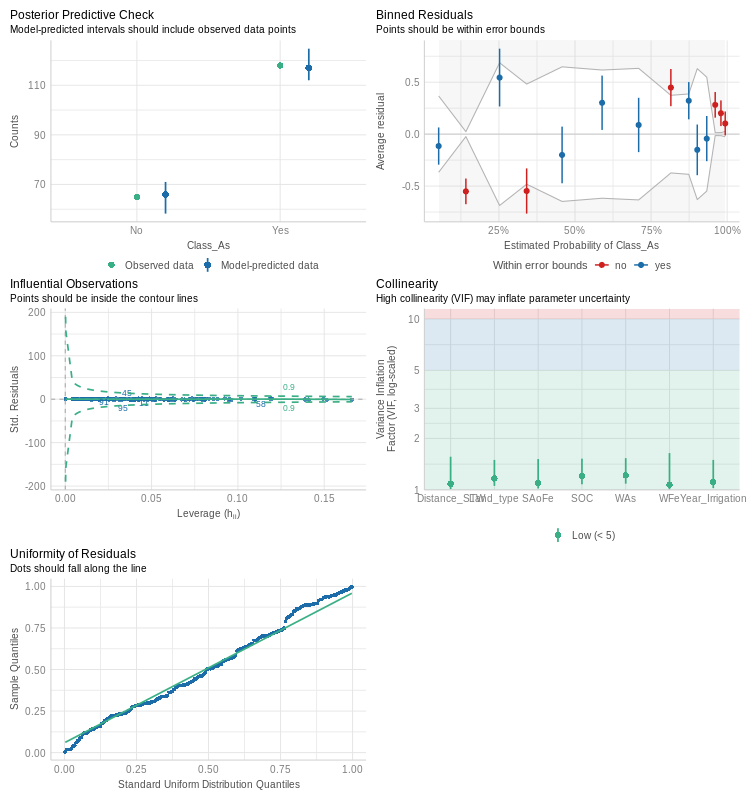

In [ ]:
%%R -w 750 -h 800 -u px
performance::check_model(fit.logit)

### The Logistic Distribution of Intercept and Slopes

The `plogis()` function is used to calculate the logistic cumulative distribution function (CDF) of Intercept and Slopes. The logistic CDF is the probability that a logistic random variable is less than or equal to a specified value. The `plogis()` function takes a numeric vector of values and returns the corresponding probabilities.

The `plogis()` function is particularly useful in the context of logistic regression, where you might be interested in converting log-odds into probabilities. If you have a logistic regression model with coefficients (intercept and slopes), you can use the logistic function and `plogis` to calculate probabilities.

In [ ]:
%%R
## Intercept
intercept = coef(fit.logit)[1]
# Back-transform the  Slope of WAs
slop_was = coef(fit.logit)[2]
log_odds<-intercept + (slop_was*train$WAs)
probabilities <- plogis(log_odds)
age.prob<-data.frame(WAs = train$WAs, LogOdds = log_odds, Probability = probabilities) |>
  glimpse()

Rows: 183
Columns: 3
$ WAs         <dbl> 0.019, 0.043, 0.037, 0.126, 0.019, 0.020, 0.207, 0.016, 0.…
$ LogOdds     <dbl> -5.830588, -5.527392, -5.603191, -4.478839, -5.830588, -5.…
$ Probability <dbl> 0.002927753, 0.003960598, 0.003672546, 0.011219281, 0.0029…


### Marginal Effects and Adjusted Predictions

The presentation of regression models, typically in the form of tables, is widely accepted as a clear and accessible method for interpreting results. However, for more intricate models that incorporate interaction or transformed terms, such as quadratic or spline terms, the use of raw regression coefficients may prove less effective, resulting in challenges when interpreting outcomes. In such cases, adjusted predictions or marginal means provide a more fitting solution. The use of visual aids can also assist in the comprehension of such effects or predictions, providing an intuitive understanding of the relationship between predictors and outcomes, even for complex models.

If we want the marginal effects for "Land_types", you may use `margins()` function of "margins" package:

In [ ]:
%%R
margins::margins(fit.logit, variables = "WAs")

  WAs
 1.57


we get the same marginal effect using `avg_slopes()` function from the **marginaleffects** package

In [ ]:
%%R
marginaleffects::avg_slopes(fit.logit, variables = "WAs")


 Estimate Std. Error    z Pr(>|z|)    S 2.5 % 97.5 %
     1.57      0.396 3.96   <0.001 13.7 0.794   2.35

Term: WAs
Type:  response 
Comparison: mean(dY/dX)
Columns: term, contrast, estimate, std.error, statistic, p.value, s.value, conf.low, conf.high, predicted_lo, predicted_hi, predicted 



To calculate marginal effects and adjusted predictions, the `predict_response()` function is used. This function can return three types of predictions, namely, conditional effects, marginal effects or marginal means, and average marginal effects or counterfactual predictions. You can set the type of prediction you want by using the `margin` argument.

In [ ]:
%%R
effect<-ggeffects::predict_response(fit.logit, "WAs", margin = "empirical")
effect

  plots.



# Average predicted probabilities of Class_As

 WAs | Predicted |     95% CI
-----------------------------
0.00 |      0.36 | 0.17, 0.59
0.20 |      0.87 | 0.77, 0.94
0.40 |      0.99 | 0.92, 1.00
0.60 |      1.00 | 0.97, 1.00



The marginal effects of "MHL", relative to "HL" is:

In [ ]:
%%R
effect$predicted[2] - effect$predicted[1]

[1] 0.5179228


**ggeffects** supports labelled data and the `plot()`- method automatically sets titles, axis - and legend-labels depending on the value and variable labels of the data.

  plots.



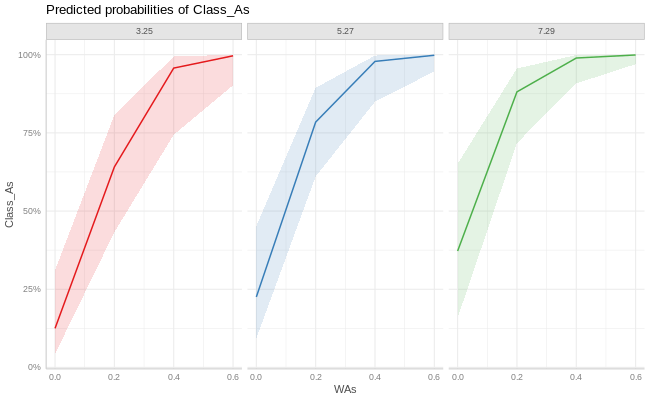

In [ ]:
%%R -w 650 -h 400 -u px
was.wfe <- predict_response(fit.logit, terms = c("WAs", "WFe"))
plot(was.wfe, facets = TRUE)

In [ ]:
%%R
was.year.wfe<- predict_response(fit.logit, terms = c("WAs", "Year_Irrigation", "WFe"))
was.year.wfe

  plots.



# Predicted probabilities of Class_As

Year_Irrigation: 2.7
WFe: 3.25

 WAs | Predicted |     95% CI
-----------------------------
0.00 |      0.04 | 0.01, 0.13
0.20 |      0.32 | 0.16, 0.54
0.40 |      0.86 | 0.45, 0.98
0.60 |      0.99 | 0.73, 1.00

Year_Irrigation: 2.7
WFe: 5.27

 WAs | Predicted |     95% CI
-----------------------------
0.00 |      0.07 | 0.02, 0.21
0.20 |      0.49 | 0.30, 0.69
0.40 |      0.92 | 0.62, 0.99
0.60 |      0.99 | 0.84, 1.00

Year_Irrigation: 2.7
WFe: 7.29

 WAs | Predicted |     95% CI
-----------------------------
0.00 |      0.14 | 0.04, 0.36
0.20 |      0.66 | 0.42, 0.84
0.40 |      0.96 | 0.75, 1.00
0.60 |      1.00 | 0.91, 1.00

Year_Irrigation: 7.2
WFe: 3.25

 WAs | Predicted |     95% CI
-----------------------------
0.00 |      0.13 | 0.04, 0.31
0.20 |      0.64 | 0.43, 0.81
0.40 |      0.96 | 0.74, 0.99
0.60 |      1.00 | 0.90, 1.00

Year_Irrigation: 7.2
WFe: 5.27

 WAs | Predicted |     95% CI
-----------------------------
0.00 |      0.23 

`geom_smooth()` using formula = 'y ~ x'


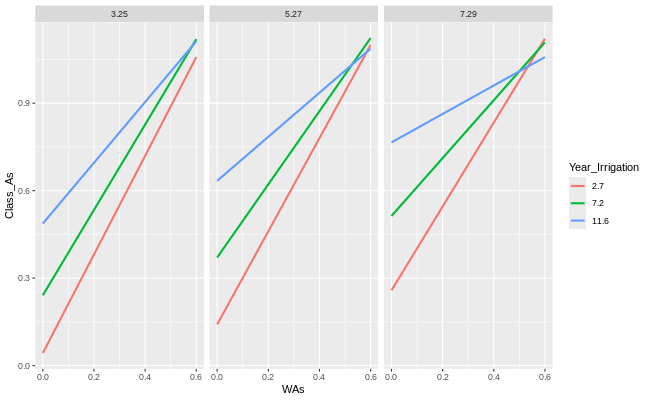

In [ ]:
%%R -w 650 -h 400 -u px
# select specific levels for grouping terms
ggplot(was.year.wfe, aes(x = x, y = predicted, colour = group)) +
  stat_smooth(method = "lm", se = FALSE) +
  facet_wrap(~facet) +
  labs(
    y = get_y_title(was.year.wfe),
    x = get_x_title(was.year.wfe),
    colour = get_legend_title(was.year.wfe)
  )

`effect_plot()` function of **jtools** package plot simple effects in logitic regression models:

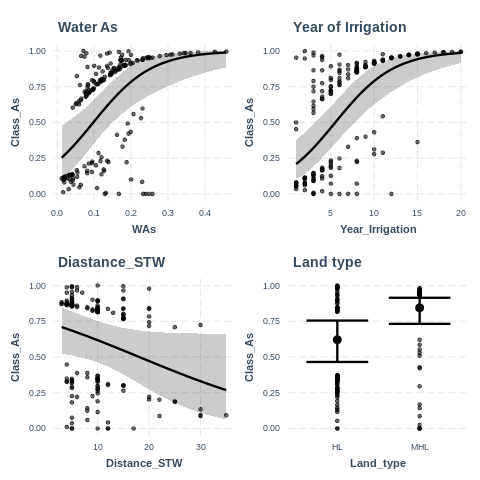

In [ ]:
%%R
p1<-jtools::effect_plot(fit.logit,
                    main.title = "Water As",
                    pred = WAs,
                    interval = TRUE,
                    partial.residuals = TRUE)
p2<-jtools::effect_plot(fit.logit,
                    main.title = "Year of Irrigation ",
                    pred = Year_Irrigation,
                    interval = TRUE,
                    partial.residuals = TRUE)
p3<-jtools::effect_plot(fit.logit,
                    main.title = "Diastance_STW",
                    pred = Distance_STW ,
                    interval = TRUE,
                    partial.residuals = TRUE)
p4<-jtools::effect_plot(fit.logit,
                    main.title = "Land type",
                    pred = Land_type,
                    interval = TRUE,
                    partial.residuals = TRUE)
library(patchwork)
(p1+p2)/(p3 +p4)

### Prediction and Model Evaluation

The `predict()` function for logistic models returns the default predictions of log-odds, which are probabilities on the logit scale. When type = `response`, the function provides the predicted probabilities.



In [ ]:
%%R
test$Pred.prob<-predict(fit.logit, test, type = "response")

In [ ]:
%%R
ggpredict(fit.logit, terms = "WAs[0:0.50 by = 0.05]")

# Predicted probabilities of Class_As

 WAs | Predicted |     95% CI
-----------------------------
0.00 |      0.23 | 0.09, 0.45
0.05 |      0.35 | 0.20, 0.55
0.15 |      0.66 | 0.50, 0.79
0.20 |      0.78 | 0.61, 0.89
0.25 |      0.87 | 0.69, 0.95
0.30 |      0.93 | 0.76, 0.98
0.35 |      0.96 | 0.81, 0.99
0.50 |      0.99 | 0.91, 1.00

Adjusted for:
*             WFe =    5.27
*           SAoFe = 2576.72
*             SOC =    1.35
* Year_Irrigation =    7.19
*    Distance_STW =    9.77
*       Land_type =      HL


Not all rows are shown in the output. Use `print(..., n = Inf)` to show
  all rows.



### Confusion Matrix at 50% Cut-Off Probability

Now, we classified an sites in the test data set with a probability of As contamination is greater than 0.5, as `Yes`, otherwise `No`.




In [ ]:
%%R
# setting the cut-off probability
test$Class_Prob <- ifelse(test$Pred.prob > 0.5,"Yes","No")

Then, we will order the both actual (`Class_As`) and predicted classes (`Class_Prob`):

In [ ]:
%%R
test$Class_Prob <- ordered(test$Class_Prob, levels = c("Yes", "No"))
test$Class_As <- ordered(test$Class_As , levels = c("Yes", "No"))
head(test)

    WAs  WFe SAoFe  SOC Year_Irrigation Distance_STW Land_type Class_As
1 0.213 5.69  2580 1.25               4            5        HL       No
2 0.053 3.06  3200 1.25               5           10        HL       No
3 0.018 2.83  2780 1.30               5           10        HL       No
4 0.137 4.09  2380 1.27               4           20        HL       No
5 0.157 3.15  2500 1.02               4           15        HL       No
6 0.159 2.95  2500 1.26               5           20        HL       No
   Pred.prob Class_Prob Class_As_nu Class_Prob_nu
1 0.71005329        Yes           0             1
2 0.13308130         No           0             0
3 0.07633919         No           0             0
4 0.17296185         No           0             0
5 0.19150838         No           0             0
6 0.20361976         No           0             0


### Overall classification accuracy

Classification accuracy is a commonly used metric to evaluate the performance of a classification model. This metric is critical in machine learning applications where the model must predict a particular class or category based on input features. The classification accuracy represents the proportion of correct predictions made by the model to the total number of predictions it made. This metric is usually expressed as a percentage. For example, if a model makes 100 predictions and 80 of them are correct, the classification accuracy would be 80%.

The formula used to calculate classification accuracy is straightforward. It is simply the ratio of the number of correct predictions to the total number of predictions made by the model, expressed as a percentage. The higher the classification accuracy, the better the performance of the model. Conversely, a lower classification accuracy indicates that the model made more incorrect predictions.

$$ {Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} \times 100\% $$

The accuracy metric measures how often a model correctly predicts class labels. However, accuracy might not be the best way to evaluate a model's performance, especially if the dataset is imbalanced or misclassification errors have different costs. In such cases, other metrics like `precision`, `recall`, `F1-score`, or `area under the ROC curve (AUC-ROC)` might provide a more comprehensive understanding of the model's performance


In [ ]:
%%R
accuracy <- mean(test$Class_As  == test$Class_Prob)
accuracy


[1] 0.75


The classification `error rate` is the percentage of observations that have been misclassified. It can be calculated by subtracting the accuracy from 1. The accuracy and error rate can be calculated by comparing the observed classes in the test data against the predicted classes by the model.

In [ ]:
%%R
error <- mean(test$Class_As != test$Class_Prob)
error

[1] 0.25


### Confusion matrix

A logistic model can make two types of errors while categorizing a site concerning As-contamination. Firstly, it can wrongly assign an As-contamination-positive site to the As-contamination-negative category. Secondly, it can wrongly assign an As-contamination-negative individual to the As-contamination-positive category.

A **confusion matrix** needs to be created to determine the proportion of these errors. This matrix helps compare the predicted outcome values against the known outcome values. It compares the observed and the predicted outcome values and shows the number of correct and incorrect predictions categorized by type of outcome. The confusion matrix is organized into rows and columns. The rows represent the actual classes, while the columns represent the predicted classes. Each cell in the matrix represents the count (or proportion) of instances that belong to the actual class and were predicted to be in the predicted class.

![alt text](http://drive.google.com/uc?export=view&id=1b-mfVANB-v7OXCpUuEN7GrMBrNRW66__)



True Positive (TP) refers to instances that are actually positive and are correctly predicted as positive. False Negative (FN) refers to instances that are actually positive but are incorrectly predicted as negative. False Positive (FP) refers to instances that are actually negative but are incorrectly predicted as positive. True Negative (TN) refers to instances that are actually negative and are correctly predicted as negative.

The R function `table()` can produce a confusion matrix to determine how many observations were correctly or incorrectly classified.

In [ ]:
%%R
table(Actual = test$Class_As, Predicted =test$Class_Prob)

      Predicted
Actual Yes No
   Yes  43  9
   No   11 17


The diagonal elements of the matrix represent the number of correct predictions, while the off-diagonal elements represent the number of incorrect predictions. To calculate the correct classification rate, you have to sum the number of correct predictions on the diagonal and then divide it by the total number of samples in the test data. In the example given, the correct classification rate can be calculated as this sum divided by the sample size of the test data (n= 80).

In [ ]:
%%R
 (44 + 20)/80

[1] 0.8


In [ ]:
%%R
# Confusion matrix, proportion of cases
table(Actual = test$Class_As, Predicted =test$Class_Prob) |>
  prop.table() %>% round(digits = 3)

      Predicted
Actual   Yes    No
   Yes 0.537 0.112
   No  0.138 0.212


### Precision

Precision is a crucial metric used to evaluate the effectiveness of a classification model, especially in binary classification problems. It is a measure of the number of true positive predictions (correct positive predictions) among all the instances predicted as positive by the model. Precision is calculated using the following formula:

$$ {Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}} $$ A high precision value indicates that the model has a low rate of false positives and is making accurate positive predictions. Conversely, a low precision value suggests that the model is making a significant number of false positive errors.

Metrics Package which has a `precision()` function to get **precision** of binary classification model. But first, we need to convert `As_Classs` and `Prob.50` from `Yes` and `No` to `1`s and `0`.

In [ ]:
%%R
test$Class_As_nu<- ifelse(test$Class_As=="Yes", 1, 0)
test$Class_Prob_nu<- ifelse(test$Class_Prob=="Yes", 1, 0)
# to calculate precision
Metrics::precision(test$Class_Prob_nu,test$Class_As_nu)

[1] 0.8269231


### Sensitivity or Recall

Sensitivity, also referred to as recall or true positive rate (TPR), is a measurement used to assess the effectiveness of a classification model, especially in binary classification cases. It calculates the ratio of accurate positive predictions (correctly optimistic predictions) among all real positive occurrences. In simpler terms, sensitivity measures how well a model identifies positive instances from all actual positive instances in the dataset. It focuses on minimizing false negatives, which occur when the model incorrectly predicts negative instances as positive.

$$ {Sensitivity (Recall)} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}} $$ If a model has a high sensitivity value, it means that it has a low rate of false negative errors, which indicates that it is effectively capturing most of the positive instances. On the other hand, if a model has a low sensitivity value, it suggests that it is missing a significant number of positive instances.

We will use `recall()` function to get recall of binary model prediction:


In [ ]:
%%R
# to calculate recall
Metrics::recall(test$Class_Prob_nu,test$Class_As_nu)

[1] 0.7962963


### ROC curve

The ROC curve is an important tool used in evaluating the performance of a binary classification model. It is a graphical plot that illustrates how well the model can distinguish between positive and negative classes at different threshold settings. The curve displays the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) as the threshold for classification changes. The true positive rate measures the proportion of actual positive instances that are correctly identified by the model, while the false positive rate measures the proportion of actual negative instances that are incorrectly classified as positive by the model. By analyzing the ROC curve, one can determine the optimal threshold setting that maximizes the true positive rate and minimizes the false positive rate, thereby improving the overall accuracy of the classification model.

The ROC curve is constructed in the following way:

1.  The classification model assigns a probability score or a decision value to each instance, which indicates the likelihood of it belonging to the positive class.

2.  By adjusting the decision threshold from 0 to 1, the model classifies instances as positive or negative. At each threshold, the true positive rate (sensitivity) and false positive rate (1 - specificity) are computed.

3.  These true positive rates and false positive rates are then plotted on the ROC curve.

A typical ROC appears as a line that starts at the bottom left corner (0, 0) and extends towards the top right corner (1, 1). If the curve is closer to the top-left corner, it indicates better performance of the model. A diagonal line from (0, 0) to (1, 1) on the ROC curve represents the performance of a random classifier. A model with perfect discrimination will have an ROC curve passing through the top-left corner, indicating a true positive rate of 1 (sensitivity) and a false positive rate of 0 (specificity). The area under the ROC curve (AUC-ROC) is a widely used summary statistic for quantifying the performance of a classification model. AUC-ROC ranges from 0 to 1, with higher values indicating better discrimination. An AUC-ROC of 0.5 suggests that the model performs no better than random guessing, while an AUC-ROC of 1 indicates perfect classification. To summarize, the ROC curve provides a clear visualization of a classification model's performance across different threshold settings. This allows users to select an appropriate threshold based on their specific needs for sensitivity and specificity.

The ROC analysis can be easily performed using `roc()` of **pROC** package.

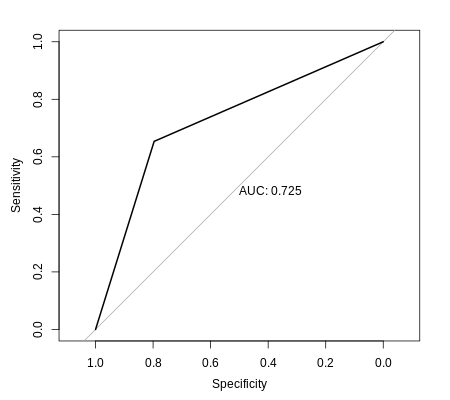

In [ ]:
%%R -w 450 -h 400 -u px
# Compute roc
res.roc <- pROC::roc(test$Class_Prob, test$Class_As)
plot.roc(res.roc, print.auc = TRUE)

On a graph, the gray diagonal line represents a classifier's performance that is no better than random chance. In contrast, a high-performing classifier will exhibit a ROC curve that rises steeply towards the top-left corner. This indicates that it can correctly identify a large number of positives without misclassifying many negatives. The AUC metric is commonly used to evaluate the performance of a classifier. An AUC value close to 1, which is the maximum possible value, is indicative of a highly effective classifier. In this case, our classifier exhibits an AUC value of 0.79, suggesting that it is indeed good. By contrast, a classifier that performs no better than random chance would have an AUC value of 0.5 when assessed using an independent test set that was not used for training the model.

In [ ]:
%%R
# Extract some interesting results
roc.data <-tibble(
  thresholds = res.roc$thresholds,
  sensitivity = res.roc$sensitivities,
  specificity = res.roc$specificities
)
# Get the probability threshold for specificity = 0.5
roc.data  |>
  filter(specificity >= 0.5)

# A tibble: 2 × 3
  thresholds sensitivity specificity
       <dbl>       <dbl>       <dbl>
1        1.5       0.654       0.796
2      Inf         0           1    


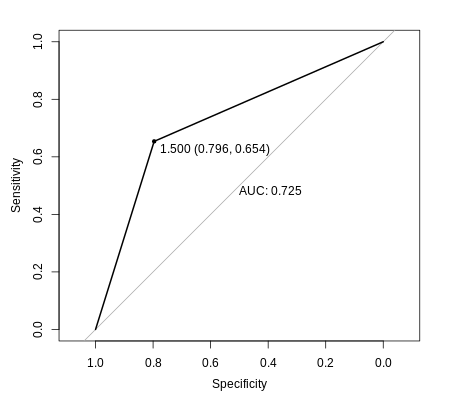

In [ ]:
%%R -w 450 -h 400 -u px
plot.roc(res.roc, print.auc = TRUE, print.thres = "best")

In [ ]:
%%R
rm(list=ls())

## Logistic Model with Caret Package

The ["caret"](https://topepo.github.io/caret/) (short for Classification And REgression Training) is a popular R package for machine learning. With its unified interface, the package offers a convenient way to use multiple machine-learning algorithms and pre-processing techniques. This makes it easier to compare and switch between different models, enhancing the process's accuracy and efficiency.

Some of the key features of the Caret package include:

**Data Preprocessing**: It provides a comprehensive set of tools to preprocess the data, such as missing value imputation, feature scaling, feature selection,and data partitioning.

**Model Training:** It supports various machine learning algorithms for classification, regression, and survival analysis, including decision trees, random forests, support vector machines, gradient boosting, and neural networks.

**Model Tuning**: It provides tools for tuning the hyperparameters of the models using various techniques such as grid search, random search, and Bayesian optimization.

**Model Evaluation**: It provides tools for evaluating the performance of the models using various metrics such as accuracy, AUC, F1-score, and log-loss.



In [ ]:
%%R
.libPaths('drive/My Drive/R')
library(caret)
library(ROCR)

### Data
We will use `read_csv()` function of **readr** package to import data as a **tidy** data.

In [ ]:
%%R
# Load data
mf<-readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/bd_soil_arsenic.csv")
# Create a binary response variable
mf$Class_As<- cut(mf$SAs,
                   breaks=c(-Inf, 14.8, Inf),
                   labels=c("No", "Yes"))
mf$Class_As<-as.factor(mf$Class_As)
# select variables
df <- mf |>
dplyr::select (WAs,  WFe,
                SAoFe, SOC,
                Year_Irrigation, Distance_STW,
                Land_type, Class_As)
# Create dummy variables
dummies <- dummyVars(Class_As ~ ., data = df)
dummies.df<-as.data.frame(predict(dummies, newdata = df))
dummies.df$Class_As<-df$Class_As
# Data splitting
set.seed(3456)
trainIndex <- createDataPartition(dummies.df$Class_As, p = .70,
                                  list = FALSE,
                                  times = 1)
df_train <- dummies.df[ trainIndex,]
df_test  <- dummies.df[-trainIndex,]

Rows: 263 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Land_type
dbl (28): ID, Longitude, Latitude, WAs, WP, WFe, WEc, WpH, WMg, WNa, WCa, WK...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Set control prameters

The function `traincontrol()` function is used for controlling the training process.

In [ ]:
%%R
set.seed(123)
train.control <- trainControl(method = "boot",
                           number = 2,
                           returnResamp = 'none',
                           summaryFunction = twoClassSummary,
                           classProbs = TRUE,
                           savePredictions = TRUE)

### Train the model

**train()** is used for training machine learning models. It provides a unified interface for a wide range of machine learning algorithms, making comparing and evaluating different models on a given dataset easier. It allows the dataset as input and allows you to specify the type of model to train, as well as various tuning parameters and performance metrics. It uses a resampling method specified by **trainControl()** to estimate the model's performance on new, unseen data, and returns a trained model object.

In [ ]:
%%R
model.logit <- train(Class_As~., data = df_train,
                     method = "glm",
                     trControl = train.control,
                     metric = "ROC")
summary(model.logit)


Call:
NULL

Coefficients: (1 not defined because of singularities)
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -2.051e+00  1.513e+00  -1.356   0.1750    
WAs              9.993e+00  3.202e+00   3.121   0.0018 ** 
WFe              2.395e-01  1.095e-01   2.187   0.0288 *  
SAoFe           -6.834e-05  3.471e-04  -0.197   0.8439    
SOC             -3.798e-01  7.773e-01  -0.489   0.6251    
Year_Irrigation  3.105e-01  6.180e-02   5.025 5.03e-07 ***
Distance_STW    -6.360e-02  3.302e-02  -1.926   0.0541 .  
Land_typeHL     -9.828e-01  4.345e-01  -2.262   0.0237 *  
Land_typeMHL            NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 241.07  on 184  degrees of freedom
Residual deviance: 160.71  on 177  degrees of freedom
AIC: 176.71

Number of Fisher Scoring iterations: 5



In [ ]:
%%R
print(model.logit)

Generalized Linear Model 

185 samples
  8 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Bootstrapped (2 reps) 
Summary of sample sizes: 185, 185 
Resampling results:

  ROC        Sens       Spec     
  0.8276761  0.7093301  0.7463768



### Training Performance

In [ ]:
%%R
getTrainPerf(model.logit)

   TrainROC TrainSens TrainSpec method
1 0.8276761 0.7093301 0.7463768    glm


### Prediction at test locations




In [ ]:
%%R
pred.test<-predict(model.logit, df_test, type = "prob")
pred.test<-pred.test[,2]

#### Confussion Matrix

In [ ]:
%%R
# setting the cut-off probability
class.test<- ifelse(pred.test > 0.5,"Yes","No")
# ordering the levels
class.test <- ordered(class.test, levels = c("Yes", "No"))
df_test$Class_As <- ordered(df_test$Class_As , levels = c("Yes", "No"))
# confusion matrix
caret::confusionMatrix(table(Actual = df_test$Class_As, Predicted = class.test))

Confusion Matrix and Statistics

      Predicted
Actual Yes No
   Yes  41 10
   No    9 18
                                         
               Accuracy : 0.7564         
                 95% CI : (0.646, 0.8465)
    No Information Rate : 0.641          
    P-Value [Acc > NIR] : 0.02018        
                                         
                  Kappa : 0.4665         
                                         
 Mcnemar's Test P-Value : 1.00000        
                                         
            Sensitivity : 0.8200         
            Specificity : 0.6429         
         Pos Pred Value : 0.8039         
         Neg Pred Value : 0.6667         
             Prevalence : 0.6410         
         Detection Rate : 0.5256         
   Detection Prevalence : 0.6538         
      Balanced Accuracy : 0.7314         
                                         
       'Positive' Class : Yes            
                                         


#### ROC Curve

We wull **ROCR** package to visualize classification performance in R. To compute measures or combinations of a model's performance, you can use the `performance()` function and apply it to the prediction object. This will generate a performance object that can be visualized using the `plot` method. For instance, you can obtain an ROC curve that represents the tradeoff between the true positive rate and the false positive rates.

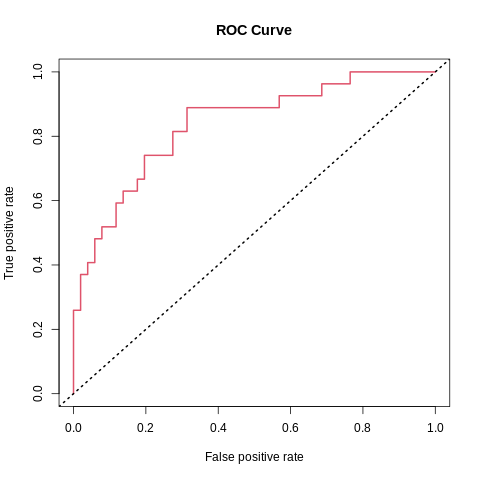

In [ ]:
%%R
pred.prob <-predict(model.logit, df_test, type = "prob")
pred.logit <- ROCR::prediction((1-pred.prob[,2]),df_test$Class_As)
perf.logit <- ROCR::performance(pred.logit, "tpr","fpr")
plot(perf.logit,main = "ROC Curve",col = 2,lwd = 2)
abline(a = 0,b = 1,lwd = 2,lty = 3,col = "black")

## Logistic Model with tidymodels

**The [tidymodels](https://www.tidymodels.org/)** is a comprehensive suite of R packages that facilitate the execution of modeling and machine learning tasks. Its user-friendly and consistent interface enables users to perform various modeling techniques efficiently, including data preprocessing, model fitting, tuning, evaluation, and visualization. Tidymodels is built on the principles of the [tidyverse](https://www.tidyverse.org/), a collection of R packages that promote a streamlined and efficient workflow for data analysis. By leveraging the features of tidymodels, users can efficiently perform complex modeling tasks and achieve better outcomes.



In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
library(tidymodels)
library(caret)

### Data

In [ ]:
%%R
mf<-readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/bd_soil_arsenic.csv")
# Create a binary response variable
mf$Class_As<- cut(mf$SAs,
                   breaks=c(-Inf, 14.8, Inf),
                   labels=c("No", "Yes"))
mf$Class_As<-as.factor(mf$Class_As)
# select variables
df <- mf |>
dplyr::select (WAs,  WFe,
                SAoFe, SOC,
                Year_Irrigation, Distance_STW,
                Land_type, Class_As)

# Create dummy variables
dummies <- dummyVars(Class_As ~ ., data = df)
dummies.df<-as.data.frame(predict(dummies, newdata = df))
dummies.df$Class_As<-df$Class_As
# data split
set.seed(1245)   # for reproducibility
split <- initial_split(dummies.df, prop = 0.7, strata = Class_As)
train <- split |>
         training()
test <-  split |>
         testing()

Rows: 263 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Land_type
dbl (28): ID, Longitude, Latitude, WAs, WP, WFe, WEc, WpH, WMg, WNa, WCa, WK...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



### Create Recipe

The [recipe](https://recipes.tidymodels.org/) function is a part of the **recipes** package in R, which is utilized for preprocessing and feature engineering in machine learning workflows. The `recipe()` function allows you to define a blueprint or a recipe for data preprocessing. It enables you to specify a sequence of steps to be applied to your data before modeling.

In [ ]:
%%R
logit_recipe <-
  recipe(Class_As ~ ., data = train)  |>
  step_zv(all_predictors()) |>
  step_normalize(all_numeric_predictors())

### Build a model

The [parsnip](https://parsnip.tidymodels.org/) package in R is designed to facilitate modeling in a uniform, organized, and modular manner. It offers the `set_engine()` function, which enables you to specify the modeling engine you wish to use for fitting a specific model.

1.  **Choose a Model**: Start by selecting a modeling function from a modeling package. For example, if you want to fit a linear regression model, you might choose the `lm()` function from base R or the `glm()` function from the stats package.

2.  **Specify the Engine**: Once you have selected the modeling function, you need to specify the modeling engine you want to use with that function. Use the `set_engine()` function to do this. The engine is the computational backend or implementation of the model. Following engines are  in `logistic_reg()` models:

* `glm` engine
* `glmnet` engine
* `keras` engine
* `stan` engine

3.  **Engine Options**: You can specify different options for the engine, such as tuning parameters or other settings specific to the implementation. Use additional arguments in the `set_engine()` function to specify these options.

4.  **Fit the Model**: After you have set the engine, use the modeling function along with the specified engine to fit the model to your data using the `fit()` function.

In [ ]:
%%R
logit_mod <-
   logistic_reg()  |>
   set_engine("glm") |>
   set_mode("classification")

### Create Workflow

The `workflows`function belongs to the [workflows](https://workflows.tidymodels.org/reference/workflows-package.html) package. This package is created to build, manage, and optimize machine learning workflows using the **tidymodels** framework. It lets you define a series of preprocessing, modeling, and post-processing steps in a modular and reproducible way. You can train your data using the `fit()` function.

First you start by creating a workflow object using the **`workflows()`** function. This object serves as a blueprint for your machine learning workflow. Then, you combine the preprocessing steps and the modeling engine into a single workflow using the **`add_recipe()`** and **`add_model()`** functions. This links the preprocessing steps with the modeling engine so that they are applied together during model fitting.

In [ ]:
%%R
logit_wflow <-
  workflow()  |>
  add_recipe(logit_recipe) |>
  add_model(logit_mod)

### Fit a GLM model

Now, there is a single function that can be used to prepare the recipe and train the model from the resulting predictors:

In [ ]:
%%R
logit_fit <-
  logit_wflow  |>
  fit(data = train)

This object has the finalized recipe and fitted model objects inside. You may want to extract the model or recipe objects from the workflow. To do this, you can use the helper functions `extract_fit_parsnip()`:


In [ ]:
%%R
logit_fit %>%
  extract_fit_parsnip() |>
  tidy()

# A tibble: 9 × 5
  term            estimate std.error statistic    p.value
  <chr>              <dbl>     <dbl>     <dbl>      <dbl>
1 (Intercept)       0.957      0.218     4.39   0.0000115
2 WAs               0.732      0.246     2.98   0.00292  
3 WFe               0.556      0.235     2.37   0.0178   
4 SAoFe            -0.0762     0.215    -0.354  0.723    
5 SOC               0.144      0.248     0.580  0.562    
6 Year_Irrigation   0.842      0.235     3.58   0.000341 
7 Distance_STW     -0.194      0.204    -0.952  0.341    
8 Land_typeHL      -0.785      0.229    -3.43   0.000610 
9 Land_typeMHL     NA         NA        NA     NA        


### Odds Ratio

The interpretation of coefficients in the log-odds term does not make much sense if you need to report it in your article or publication. That is why the concept of odds ratio was introduced.


In [ ]:
%%R
tidy(logit_fit, exponentiate = TRUE)

# A tibble: 9 × 5
  term            estimate std.error statistic    p.value
  <chr>              <dbl>     <dbl>     <dbl>      <dbl>
1 (Intercept)        2.60      0.218     4.39   0.0000115
2 WAs                2.08      0.246     2.98   0.00292  
3 WFe                1.74      0.235     2.37   0.0178   
4 SAoFe              0.927     0.215    -0.354  0.723    
5 SOC                1.15      0.248     0.580  0.562    
6 Year_Irrigation    2.32      0.235     3.58   0.000341 
7 Distance_STW       0.823     0.204    -0.952  0.341    
8 Land_typeHL        0.456     0.229    -3.43   0.000610 
9 Land_typeMHL      NA        NA        NA     NA        


 Here we filtered out the variables whose p-values are less than 0.05 (5%) significant level.

In [ ]:
%%R
tidy(logit_fit, exponentiate = TRUE) |>
  filter(p.value < 0.05)

# A tibble: 5 × 5
  term            estimate std.error statistic   p.value
  <chr>              <dbl>     <dbl>     <dbl>     <dbl>
1 (Intercept)        2.60      0.218      4.39 0.0000115
2 WAs                2.08      0.246      2.98 0.00292  
3 WFe                1.74      0.235      2.37 0.0178   
4 Year_Irrigation    2.32      0.235      3.58 0.000341 
5 Land_typeHL        0.456     0.229     -3.43 0.000610 


### Model Performance

We can use [yardstick](https://yardstick.tidymodels.org/) package to estimate how well models are working using tidy data principles.

The following [metric](https://yardstick.tidymodels.org/articles/metric-types.html) are available for classification  model evaluation:

* `accuracy()`: Accuracy
*	`bal_accuracy()`:Balanced accuracy
*	`detection_prevalence()`: Detection prevalence
* `f_meas()`: F Measure
* `j_index()`: J-index
* `kap()`: Kappa
* `mcc()`: Matthews correlation coefficient
* `npv()`: Negative predictive value
* `ppv()`: Positive predictive value
* `precision()`:Precision
* `recall()`: Recall
* `sens()`: Sensitivity
* `sensitivity()`: Sensitivity
* `spec()`: Specificity
* `specificity()`: Specificity

In [ ]:
%%R
# Prediction
logit_training_pred <-
  predict(logit_fit, train) %>%
  bind_cols(predict(logit_fit, train, type = "prob")) %>%
  bind_cols(train %>% select(Class_As))


In [ ]:
%%R
# ROC
logit_training_pred  |>
  yardstick::roc_auc(truth = Class_As, .pred_No)

In [ ]:
%%R
# Accuracy
logit_training_pred |>
  yardstick::accuracy(Class_As, .pred_class)

# A tibble: 1 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy binary         0.847


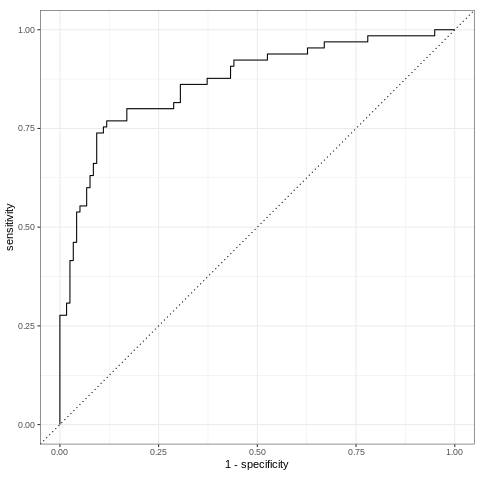

In [ ]:
%%R
# ROC curve
logit_training_pred |>
  yardstick::roc_curve(Class_As, .pred_No) |>
  autoplot()

### Prediction at test locations

In [ ]:
%%R
# Prediction
logit_test_pred <-
  predict(logit_fit, test) %>%
  bind_cols(predict(logit_fit, test, type = "prob")) %>%
  bind_cols(test %>% select(Class_As))

In [ ]:
%%R
# Confusion matrix
conf_mat(logit_test_pred, truth = Class_As,
         estimate = .pred_class)

          Truth
Prediction No Yes
       No  18   9
       Yes 10  43


In [ ]:
%%R
# ROC
logit_test_pred  |>
  yardstick::roc_auc(truth = Class_As, .pred_No)

# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 roc_auc binary         0.829


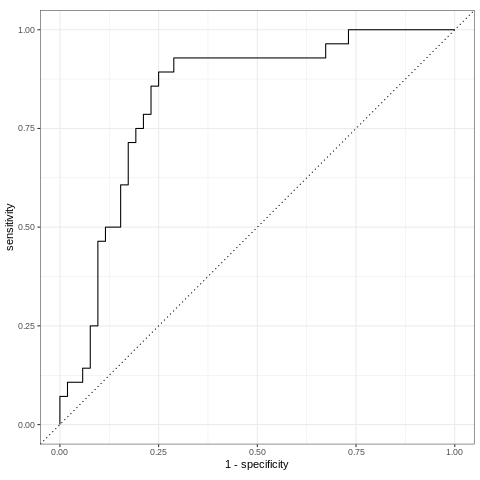

In [ ]:
%%R
# ROC curve
logit_test_pred |>
  yardstick::roc_curve(Class_As, .pred_No) |>
  autoplot()

In [ ]:
%%R
rm(list=ls())

## Logistic Regression with h20

The **H2O** package is a powerful open-source software that is specifically designed for data analysis and machine learning. It is known for being incredibly fast, scalable, and easy to use, making it a popular choice among data scientists and machine learning engineers.



### Import h2o

In [ ]:
%%R
library(h2o)
h2o.init()
#disable progress bar for RMarkdown
h2o.no_progress()
# Optional: remove anything from previous session
h2o.removeAll()


### Data

In [ ]:
%%R
# Load data
mf<-readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/bd_soil_arsenic.csv")
# Create a binary response variable
mf$Class_As<- cut(mf$SAs,
                   breaks=c(-Inf, 14.8, Inf),
                   labels=c("No", "Yes"))
mf$Class_As<-as.factor(mf$Class_As)
# select variables
df <- mf |>
dplyr::select (WAs,  WFe,
                SAoFe, SOC,
                Year_Irrigation, Distance_STW,
                Land_type, Class_As)

Rows: 263 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Land_type
dbl (28): ID, Longitude, Latitude, WAs, WP, WFe, WEc, WpH, WMg, WNa, WCa, WK...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Import data into h20 cluster


In [ ]:
%%R
h_df=as.h2o(df)

### Split Data

In [ ]:
%%R
# Split dataset giving the training dataset 75% of the data
df_split <- h2o.splitFrame(data = h_df, ratios = 0.75)
print(dim(df_split[[1]]))
print(dim(df_split[[2]]))

[1] 199   8
[1] 64  8


In [ ]:
%%R
# Create a training set from the 1st dataset in the split
h_train <- df_split[[1]]
# Create a testing set from the 2nd dataset in the split
h_test <- df_split[[2]]

### Define response and predictors

In [ ]:
%%R
y <- "Class_As"
x <- setdiff(names(h_df), y)

### Fit Logistic model

We fit fit a GLM using **h2o.glm()** function with family = `binomial`  and link =`logit` arguments.   


In [ ]:
%%R
logit_h2o <- h2o.glm(
  training_frame = h_train,
  # validation_frame = valid,
  x=x,
  y=y,
  model_id = "Logit_MODEL_ID",
  family = "binomial",
  link= "logit",
  compute_p_values = TRUE,
  nfolds = 10,
  keep_cross_validation_models = TRUE,
  early_stopping = TRUE,
  stopping_rounds = 2,
  stopping_metric = "logloss",
  remove_collinear_columns = TRUE,
  standardize = TRUE,
  seed = 212)

In [ ]:
%%R
summary(logit_h2o)

Model Details:

H2OBinomialModel: glm
Model Key:  Logit_MODEL_ID 
GLM Model: summary
    family  link                                regularization
1 binomial logit Elastic Net (alpha = 0.5, lambda = 3.525E-4 )
  number_of_predictors_total number_of_active_predictors number_of_iterations
1                          6                           6                   51
   training_frame
1 RTMP_sid_a523_4

H2OBinomialMetrics: glm
** Reported on training data. **

MSE:  0.141391
RMSE:  0.3760199
LogLoss:  0.4422952
Mean Per-Class Error:  0.2726467
AUC:  0.8528239
AUCPR:  0.8974802
Gini:  0.7056478
R^2:  0.379931
Residual Deviance:  176.0335
AIC:  190.0335

Confusion Matrix (vertical: actual; across: predicted) for F1-optimal threshold:
       No Yes    Error     Rate
No     34  36 0.514286   =36/70
Yes     4 125 0.031008   =4/129
Totals 38 161 0.201005  =40/199

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold      value idx
1           

### Retrieve a graphical plot of the standardized coefficient magnitudes

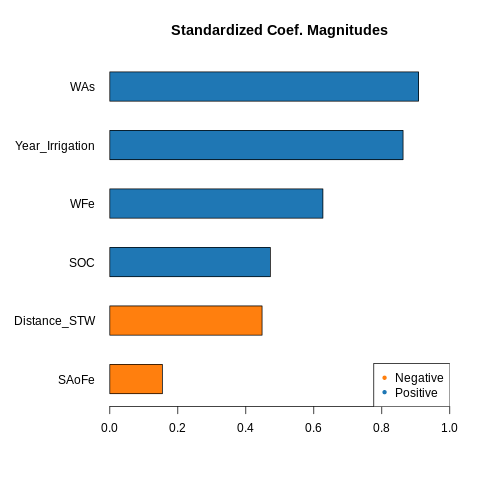

In [ ]:
%%R
h2o.std_coef_plot(logit_h2o)

### Model Performance

In [ ]:
%%R
# training performance
perf.train<-h2o.performance(logit_h2o, h_train)
perf.train

H2OBinomialMetrics: glm

MSE:  0.141391
RMSE:  0.3760199
LogLoss:  0.4422952
Mean Per-Class Error:  0.2726467
AUC:  0.8528239
AUCPR:  0.8974802
Gini:  0.7056478
R^2:  0.379931
Residual Deviance:  176.0335
AIC:  190.0335

Confusion Matrix (vertical: actual; across: predicted) for F1-optimal threshold:
       No Yes    Error     Rate
No     34  36 0.514286   =36/70
Yes     4 125 0.031008   =4/129
Totals 38 161 0.201005  =40/199

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold      value idx
1                       max f1  0.318005   0.862069 160
2                       max f2  0.203204   0.923521 176
3                 max f0point5  0.694934   0.859519 102
4                 max accuracy  0.586257   0.804020 127
5                max precision  0.995783   1.000000   0
6                   max recall  0.175629   1.000000 182
7              max specificity  0.995783   1.000000   0
8             max absolute_mcc  0.586257   0.571700 127
9

In [ ]:
%%R
# test performance
perf.test<-h2o.performance(logit_h2o, h_test)
perf.test

H2OBinomialMetrics: glm

MSE:  0.1649293
RMSE:  0.4061149
LogLoss:  0.5096314
Mean Per-Class Error:  0.2974549
AUC:  0.8154825
AUCPR:  0.8625679
Gini:  0.630965
R^2:  0.2836157
Residual Deviance:  65.23282
AIC:  79.23282

Confusion Matrix (vertical: actual; across: predicted) for F1-optimal threshold:
       No Yes    Error    Rate
No     11  12 0.521739  =12/23
Yes     3  38 0.073171   =3/41
Totals 14  50 0.234375  =15/64

Maximum Metrics: Maximum metrics at their respective thresholds
                        metric threshold     value idx
1                       max f1  0.448936  0.835165  49
2                       max f2  0.178604  0.915179  59
3                 max f0point5  0.684171  0.864865  35
4                 max accuracy  0.684171  0.796875  35
5                max precision  0.999492  1.000000   0
6                   max recall  0.178604  1.000000  59
7              max specificity  0.999492  1.000000   0
8             max absolute_mcc  0.684171  0.586692  35
9   max min_p

In [ ]:
%%R
# CV-performance
h2o.performance(logit_h2o, xval=TRUE)

### ROC Curve

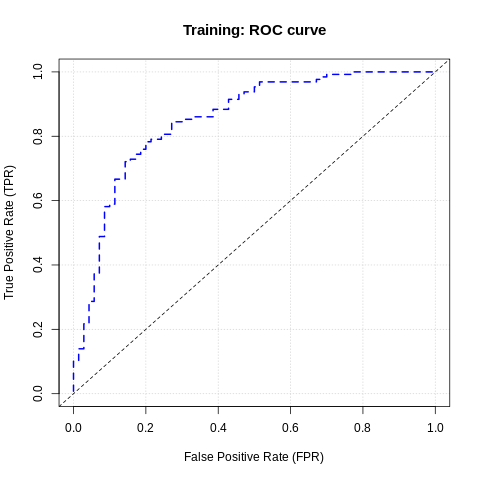

In [ ]:
%%R
# training
plot(logit_h2o@model$training_metrics, type = "roc", col = "blue", typ = "l", main = "")
title(main = "Training: ROC curve",
      cex.main = 1.25,
      )

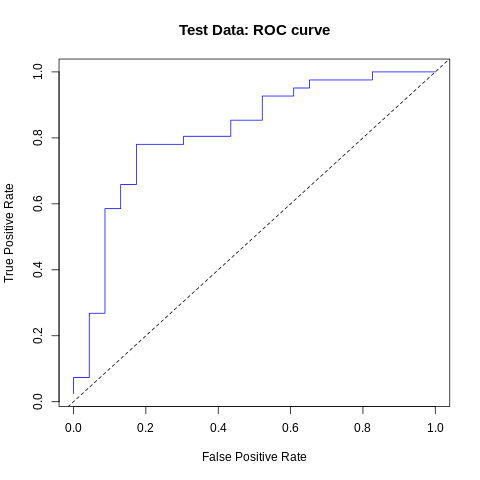

In [ ]:
%%R
# test data
roc.test <- data.frame(perf.test@metrics$thresholds_and_metric_scores) |>
    select(c(tpr, fpr))
plot(roc.test$fpr, roc.test$tpr, type= "l", col = "blue", xlab="", ylab="")
title(main = "Test Data: ROC curve",
      cex.main = 1.25,
      xlab="False Positive Rate",
      ylab="True Positive Rate"
      )
abline(0, 1, lty=2)

%%R
rm(list=ls())

## Logistic model with Keras/Tensorflow
[Keras](https://keras.io/) is a popular high-level deep learning library that provides a convenient and user-friendly API for building and training deep learning models. [TensorFlow](https://www.tensorflow.org/) is a powerful open-source deep learning framework that serves as the backend for Keras and provides efficient computation for training and running deep learning models.

![alt text](http://drive.google.com/uc?export=view&id=1XW_i_SRQj4p9t4PJwU8TMoRl-oMV_HFy)

While Keras is primarily known for its Python implementation, it also has support for other programming languages, including R. In R, you can use the [keras3 package](https://posit.co/blog/keras-for-r/) which provides an interface to the Keras library with [TensorFlow](https://tensorflow.rstudio.com/)

In this excercise, we will run R code in a Colab notebook by creating an R runtime environment without  **rpy2** package.

Here’s how you can set it up:

1. In the toolbar, click on the “Runtime” menu and select “Change runtime type.”

2. In the dialog box that appears, select “R” from the “Runtime type” dropdown.

3. Click on the “Save” button to apply the changes.


![alt text](http://drive.google.com/uc?export=view&id=1o_EmN1Z-NHyEiFzgu5QptKN6mK5i401b)


Once you have set up the R runtime environment, you can start writing and executing R code in the notebook cells. To run a code cell, press Shift+Enter or click the “Play” button next to the cell.

You can install R packages in Colab by using the **install.packages()** function.

### Installation
The packages tidymodel, keras and some important packages are not installed in google colab. We have to install these packages:

In [ ]:
pkg <- c(
		 'tidyverse',
		 'caret',
		 'tidymodels',
     'keras',
     'tensorflow',
     'Metrics'
      )
new.packages <- pkg[!(pkg %in% installed.packages()[,"Package"])]
		if(length(new.packages)) install.packages(new.packages, repos = "http://cran.us.r-project.org")

### Load Packages

In [ ]:
library(tidyverse)
library(tidymodels)
library(tensorflow)
library(keras)
library(caret)

### Data

In [ ]:
mf<-readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/bd_soil_arsenic.csv")
# Create a binary response variable
mf$Class_As<- cut(mf$SAs,
                   breaks=c(-Inf, 14.8, Inf),
                   labels=c("No", "Yes"))
mf$Class_As<-as.factor(mf$Class_As)
# select variables
df <- mf |>
dplyr::select (WAs,  WFe,
                SAoFe, SOC,
                Year_Irrigation, Distance_STW,
                Land_type, Class_As)

# Create dummy variables
dummies <- dummyVars(Class_As ~ ., data = df)
dummies.df<-as.data.frame(predict(dummies, newdata = df))
dummies.df$Class_As<-df$Class_As

dataset <- recipe(Class_As ~ ., data = df) |>
  step_zv(all_predictors()) |>
  step_dummy(all_nominal()) |>
  prep() |>
  bake(new_data = NULL) |>
  glimpse()

Rows: 263 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Land_type
dbl (28): ID, Longitude, Latitude, WAs, WP, WFe, WEc, WpH, WMg, WNa, WCa, WK...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
“variable 'Class_As' is not a factor”


Rows: 263
Columns: 8
$ WAs             <dbl> 0.059, 0.059, 0.079, 0.122, 0.072, 0.042, 0.075, 0.064…
$ WFe             <dbl> 3.44, 4.93, 9.70, 8.58, 4.78, 6.95, 7.81, 8.14, 8.99, …
$ SAoFe           <dbl> 2500, 2670, 2160, 2500, 2060, 2500, 2520, 2140, 2150, …
$ SOC             <dbl> 1.66, 1.26, 1.36, 1.61, 1.26, 1.74, 1.71, 1.69, 1.41, …
$ Year_Irrigation <dbl> 14, 20, 10, 8, 10, 9, 8, 10, 8, 2, 20, 4, 15, 10, 5, 4…
$ Distance_STW    <dbl> 5, 6, 5, 8, 5, 5, 10, 8, 10, 8, 5, 5, 9, 5, 10, 10, 12…
$ Land_type_MHL   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, …
$ Class_As_Yes    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, …


### Split the data into training and test sets

In [ ]:
split <- initial_split(dataset, 0.8)
train_dataset <- training(split)
test_dataset <- testing(split)

### Split features from labels (Class_As)

Separate the target or response value---the "label" (Class_As_Yes) from the features. This label is the value that you will train the model to predict. The next step is to prepare the data for Keras by scaling it. We’ll use the scale function to achieve this. We’ll then use the `to_categorical` function on the labels to ensure that they’re categorical.

In [ ]:

# training data set
X_train <- train_dataset  |>
  select(-Class_As_Yes) |>
  scale()
y_train <- to_categorical(train_dataset$Class_As_Yes)

# test dataset
X_test <- test_dataset  |>
  select(-Class_As_Yes) |>
  scale()
y_test <- to_categorical(test_dataset$Class_As_Yes)

### Build and fit the Keras Sequential model

In [ ]:
model <- keras_model_sequential()

model |>
  layer_dense(units = 1, activation = 'relu', input_shape = ncol(X_train))  |>
  layer_dense(units = 2, activation = 'sigmoid')

model |>  compile(
  loss = 'binary_crossentropy',
  optimizer = 'adam',
  metrics = c('accuracy')
)

history<-model |> fit(
  X_train, y_train,
  epochs = 100,
  batch_size = 5,
  validation_split = 0.3
)
```

In [ ]:
summary(model)

In [ ]:
plot(history)

### Model Performance

In [ ]:
score<-model |>  evaluate(X_test, y_test, bath_size=100)
cat('Test loss:', score[[1]], '\n')

In [ ]:
cat('Test accuracy:', score[[2]], '\n')

In [ ]:
predictions <- predict(model, X_test)
pred_digits <- apply(predictions, 1, which.max) -1
confusionMatrix(as.factor(pred_digits), as.factor(test_dataset$Class_As_Yes))

## Summary and Conclusion

This tutorial explains how to apply logistic regression to perform binary classification in R. It covers data preparation, model fitting, evaluation, and interpretation of results. It also provides insights into interpreting the coefficients of the logistic regression model and discusses potential challenges. By following this tutorial, readers can gain a solid understanding of logistic regression analysis in R.

Using logistic regression in R, researchers and data analysts can make informed decisions, identify important factors influencing binary outcomes, and gain insights into the relationships between predictors and outcome probabilities.


## References

1.  [How to Perform Logistic Regression in R](https://www.statology.org/logistic-regression-in-r/)

2.  [Evaluation of Classification Model Accuracy: Essentials](http://www.sthda.com/english/articles/36-classification-methods-essentials/143-evaluation-of-classification-model-accuracy-essentials/)

3.  [Precision, Recall and F1-Score using R](https://www.geeksforgeeks.org/precision-recall-and-f1-score-using-r/)

4.  [Chapter 6 Binary Logistic Regression](https://www.bookdown.org/rwnahhas/RMPH/blr.html)

5.  [Chapter 10 Binary Logistic Regression](https://bookdown.org/chua/ber642_advanced_regression/binary-logistic-regression.html)

6.  R Online Manual: [glm](http://stat.ethz.ch/R-manual/R-patched/library/stats/html/glm.html)

7.  [Applied Logistic Regression (Second Edition)](https://stats.oarc.ucla.edu/examples/alr2/) by David Hosmer and Stanley Lemeshow

8.  [Stat Books for Loan, Logistic Regression and Limited Dependent Variables](https://stats.oarc.ucla.edu/books/#Logistic%20Regression%20and%20Related%20Methods)



